<a href="https://colab.research.google.com/github/wahyualvyy/Mining-Google-Colab/blob/main/Model_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAM NAIVE BAYES UNTUK DETEKSI CYBERBULLYING

Silakan upload file dataset Anda!
Format yang didukung: .xlsx atau .csv
Kolom yang diperlukan: tweet, tweet_clean, label


Saving val_data.xlsx to val_data (1).xlsx
Saving train_data.xlsx to train_data (1).xlsx
Saving test_data.xlsx to test_data (1).xlsx

File yang diupload: ['val_data (1).xlsx', 'train_data (1).xlsx', 'test_data (1).xlsx']

Mencoba memuat file: val_data (1).xlsx
✓ Berhasil memuat val_data (1).xlsx
  Shape: (2189, 3)
  Kolom: ['tweet', 'tweet_clean', 'label']
  ✓ Semua kolom yang diperlukan tersedia

✓ Dataset berhasil dimuat!

EKSPLORASI DATASET
Shape dataset: (2189, 3)
Kolom: ['tweet', 'tweet_clean', 'label']

Missing values:
Tidak ada missing values

Distribusi Label:
label
0    1128
1    1061
Name: count, dtype: int64
Non-Bullying: 1128 (51.5%)
Bullying: 1061 (48.5%)

Contoh data (5 baris pertama):
                                               tweet  \
0  @Yom_N_Friends Kadrun yaman, lokal dn kaum int...   
1                USER come down for it, 3 weeks away   
2  @aladinmovic2000 @ArtaN7707 @PDI_Perjuangan : ...   
3  Visi Presiden Prabowo jadi semangat baru buat ...   
4  @mikaelM3

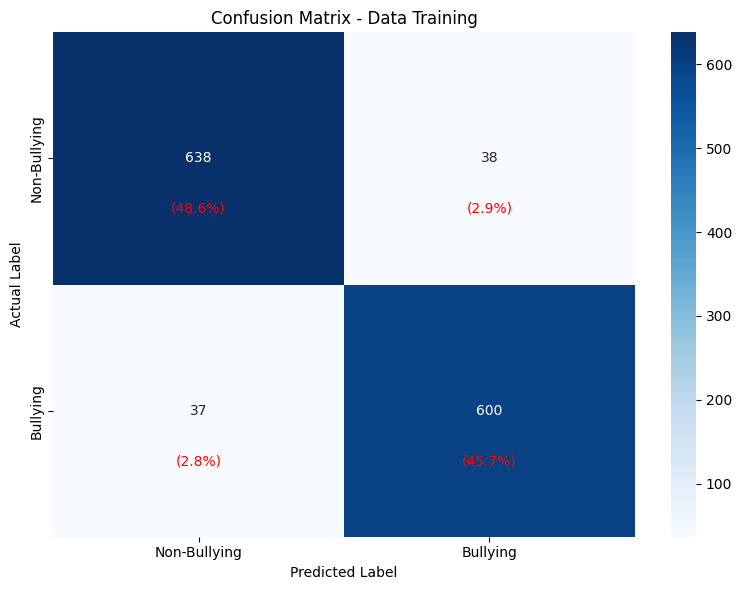


📊 EVALUASI PADA DATA VALIDATION
----------------------------------------
Akurasi: 0.8904 (89.04%)

Classification Report:
                  precision    recall  f1-score   support

Non-Bullying (0)     0.8836    0.9071    0.8952       226
    Bullying (1)     0.8981    0.8726    0.8852       212

        accuracy                         0.8904       438
       macro avg     0.8908    0.8899    0.8902       438
    weighted avg     0.8906    0.8904    0.8903       438

Confusion Matrix:
                Predicted
Actual    Non-Bullying  Bullying
Non-Bullying       205         21
Bullying            27        185


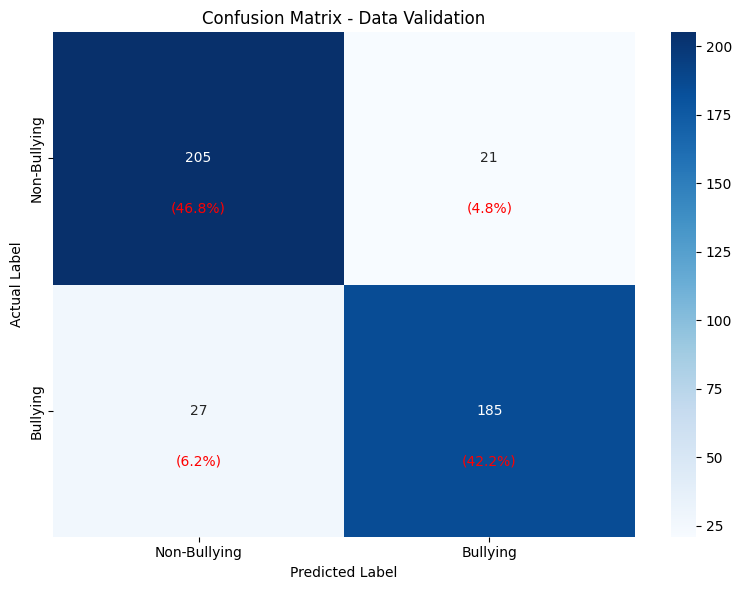


📊 EVALUASI PADA DATA TESTING
----------------------------------------
Akurasi: 0.8836 (88.36%)

Classification Report:
                  precision    recall  f1-score   support

Non-Bullying (0)     0.8924    0.8805    0.8864       226
    Bullying (1)     0.8744    0.8868    0.8806       212

        accuracy                         0.8836       438
       macro avg     0.8834    0.8837    0.8835       438
    weighted avg     0.8837    0.8836    0.8836       438

Confusion Matrix:
                Predicted
Actual    Non-Bullying  Bullying
Non-Bullying       199         27
Bullying            24        188


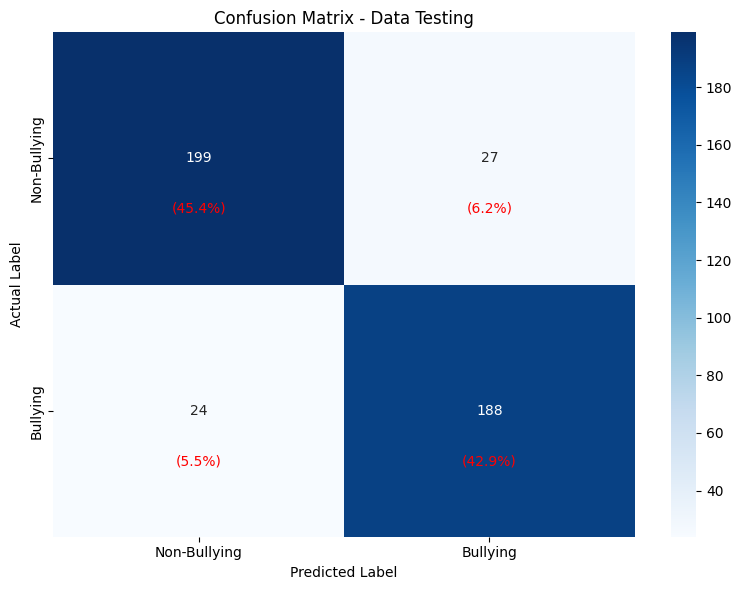


RINGKASAN PERFORMA MODEL
   Dataset  Ukuran  Akurasi
  Training    1313 0.942879
Validation     438 0.890411
   Testing     438 0.883562


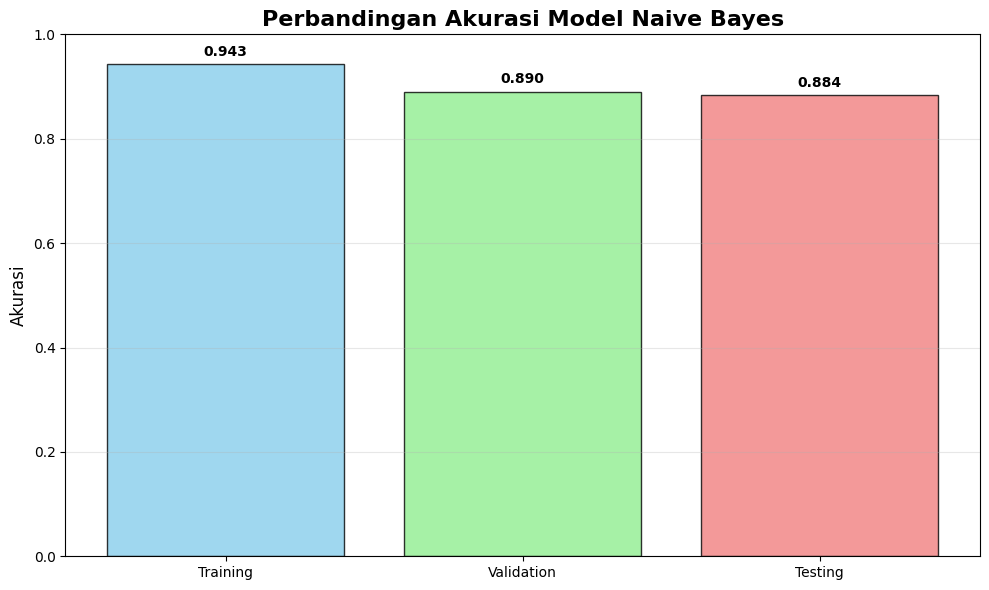


TESTING DENGAN CONTOH TEKS
Teks: 'You are so stupid and ugly!'
Prediksi: 🟢 NON-BULLYING
Confidence: 51.49%
Probabilitas [Non-Bullying: 0.515, Bullying: 0.485]
------------------------------------------------------------
Teks: 'Have a great day everyone!'
Prediksi: 🔴 BULLYING
Confidence: 58.91%
Probabilitas [Non-Bullying: 0.411, Bullying: 0.589]
------------------------------------------------------------
Teks: 'I hate you so much, you worthless person'
Prediksi: 🔴 BULLYING
Confidence: 67.34%
Probabilitas [Non-Bullying: 0.327, Bullying: 0.673]
------------------------------------------------------------
Teks: 'Thanks for sharing this helpful information'
Prediksi: 🟢 NON-BULLYING
Confidence: 60.01%
Probabilitas [Non-Bullying: 0.600, Bullying: 0.400]
------------------------------------------------------------
Teks: 'Kill yourself, nobody likes you'
Prediksi: 🟢 NON-BULLYING
Confidence: 51.49%
Probabilitas [Non-Bullying: 0.515, Bullying: 0.485]
--------------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ File berhasil didownload!

🎉 PROGRAM SELESAI - RINGKASAN AKHIR
📊 Dataset: 2189 total samples
🎯 Model: Naive Bayes dengan TF-IDF
⚡ Akurasi Training: 0.943 (94.3%)
✅ Akurasi Validation: 0.890 (89.0%)
🎖️ Akurasi Testing: 0.884 (88.4%)
📈 Performa Model: EXCELLENT 🌟

💾 File yang disimpan:
- naive_bayes_cyberbullying_model.pkl (Model yang sudah dilatih)
- model_evaluation_results.csv (Hasil evaluasi)

🚀 Model siap digunakan untuk deteksi cyberbullying!

FUNGSI INTERAKTIF - COBA PREDIKSI SENDIRI
Jalankan kode berikut untuk mencoba prediksi teks Anda sendiri:

# Contoh penggunaan:
test_text = "Masukkan teks yang ingin diprediksi di sini"
prediction, probabilities = predict_cyberbullying(test_text)



In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import joblib

# =============================================================================
# STEP 1: UPLOAD DAN LOAD DATASET
# =============================================================================

print("="*60)
print("PROGRAM NAIVE BAYES UNTUK DETEKSI CYBERBULLYING")
print("="*60)

print("\nSilakan upload file dataset Anda!")
print("Format yang didukung: .xlsx atau .csv")
print("Kolom yang diperlukan: tweet, tweet_clean, label")

uploaded = files.upload()

if not uploaded:
    print("Tidak ada file yang diupload! Program dihentikan.")
    exit()

print(f"\nFile yang diupload: {list(uploaded.keys())}")

# =============================================================================
# STEP 2: LOAD DAN EKSPLORASI DATASET
# =============================================================================

def load_any_dataset():
    """Fungsi untuk memuat dataset dalam format apapun"""
    for filename in uploaded.keys():
        try:
            print(f"\nMencoba memuat file: {filename}")

            # Coba load sebagai Excel
            if filename.endswith('.xlsx'):
                df = pd.read_excel(filename)
            # Coba load sebagai CSV
            elif filename.endswith('.csv'):
                df = pd.read_csv(filename)
            else:
                # Coba sebagai Excel dulu, lalu CSV
                try:
                    df = pd.read_excel(filename)
                except:
                    df = pd.read_csv(filename)

            print(f"✓ Berhasil memuat {filename}")
            print(f"  Shape: {df.shape}")
            print(f"  Kolom: {list(df.columns)}")

            # Cek kolom yang diperlukan
            required_cols = ['tweet', 'tweet_clean', 'label']
            missing_cols = [col for col in required_cols if col not in df.columns]

            if missing_cols:
                print(f"  ⚠️ Kolom yang hilang: {missing_cols}")
                print("  Mencoba mencocokkan dengan kolom yang tersedia...")

                # Coba cocokkan dengan kolom yang mirip
                col_mapping = {}
                for req_col in required_cols:
                    for actual_col in df.columns:
                        if req_col.lower() in actual_col.lower() or actual_col.lower() in req_col.lower():
                            col_mapping[req_col] = actual_col
                            break

                if len(col_mapping) >= 2:  # Minimal butuh 2 kolom (text dan label)
                    print(f"  ✓ Mapping kolom: {col_mapping}")
                    # Rename kolom
                    df = df.rename(columns={v: k for k, v in col_mapping.items()})

                    # Jika tweet_clean tidak ada, gunakan tweet
                    if 'tweet_clean' not in df.columns and 'tweet' in df.columns:
                        df['tweet_clean'] = df['tweet']
                        print("  ✓ Menggunakan kolom 'tweet' sebagai 'tweet_clean'")

                    return df
                else:
                    print(f"  ❌ Tidak dapat mencocokkan kolom yang diperlukan")
                    continue
            else:
                print("  ✓ Semua kolom yang diperlukan tersedia")
                return df

        except Exception as e:
            print(f"  ❌ Error memuat {filename}: {str(e)}")
            continue

    return None

# Load dataset
dataset = load_any_dataset()

if dataset is None:
    print("\n❌ GAGAL MEMUAT DATASET!")
    print("Pastikan file memiliki kolom: tweet, tweet_clean, label")
    print("Atau kolom dengan nama serupa (text, content, sentence, class, target, dst)")
    exit()

print(f"\n✓ Dataset berhasil dimuat!")

# =============================================================================
# STEP 3: EKSPLORASI DAN PREPROCESSING DATA
# =============================================================================

print(f"\n{'='*50}")
print("EKSPLORASI DATASET")
print(f"{'='*50}")

print(f"Shape dataset: {dataset.shape}")
print(f"Kolom: {list(dataset.columns)}")

# Cek missing values
print(f"\nMissing values:")
missing_info = dataset.isnull().sum()
print(missing_info[missing_info > 0] if missing_info.sum() > 0 else "Tidak ada missing values")

# Info tentang label
if 'label' in dataset.columns:
    print(f"\nDistribusi Label:")
    label_counts = dataset['label'].value_counts().sort_index()
    print(label_counts)

    total = len(dataset)
    for label, count in label_counts.items():
        percentage = count/total*100
        label_name = "Bullying" if label == 1 else "Non-Bullying" if label == 0 else f"Label {label}"
        print(f"{label_name}: {count} ({percentage:.1f}%)")

# Tampilkan contoh data
print(f"\nContoh data (5 baris pertama):")
display_cols = [col for col in ['tweet', 'tweet_clean', 'label'] if col in dataset.columns]
print(dataset[display_cols].head())

# =============================================================================
# STEP 4: PREPROCESSING DATA
# =============================================================================

print(f"\n{'='*50}")
print("PREPROCESSING DATA")
print(f"{'='*50}")

# Hapus baris dengan missing values pada kolom penting
print("Membersihkan data...")
important_cols = ['tweet_clean', 'label']
available_cols = [col for col in important_cols if col in dataset.columns]

if len(available_cols) < 2:
    print("❌ Tidak cukup kolom untuk melanjutkan!")
    exit()

dataset_clean = dataset.dropna(subset=available_cols).copy()
print(f"Data setelah cleaning: {dataset_clean.shape}")

# Pastikan label dalam format yang benar
dataset_clean['label'] = dataset_clean['label'].astype(int)
print(f"Unique labels: {sorted(dataset_clean['label'].unique())}")

# Persiapkan text data
if 'tweet_clean' in dataset_clean.columns:
    dataset_clean['text'] = dataset_clean['tweet_clean'].astype(str)
else:
    dataset_clean['text'] = dataset_clean['tweet'].astype(str)

print("✓ Preprocessing selesai")

# =============================================================================
# STEP 5: SPLIT DATA JIKA HANYA ADA SATU DATASET
# =============================================================================

print(f"\n{'='*50}")
print("PEMBAGIAN DATA")
print(f"{'='*50}")

# Extract features dan target
X = dataset_clean['text']
y = dataset_clean['label']

# Split data menjadi train, validation, dan test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 dari 0.8 = 0.2 total
)

print(f"Pembagian dataset:")
print(f"- Training: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"- Validation: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"- Testing: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Cek distribusi label di setiap split
for name, y_split in [("Train", y_train), ("Validation", y_val), ("Test", y_test)]:
    counts = y_split.value_counts().sort_index()
    total = len(y_split)
    bullying_pct = counts.get(1, 0) / total * 100
    print(f"{name} - Bullying: {bullying_pct:.1f}%")

# =============================================================================
# STEP 6: MEMBANGUN MODEL NAIVE BAYES
# =============================================================================

print(f"\n{'='*50}")
print("MEMBANGUN MODEL NAIVE BAYES")
print(f"{'='*50}")

# Membuat pipeline dengan TF-IDF dan Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,       # Batasi fitur untuk menghindari overfitting
        ngram_range=(1, 2),      # Unigram dan bigram
        lowercase=True,          # Convert ke lowercase
        min_df=2,                # Minimum document frequency
        max_df=0.95,             # Maximum document frequency
        strip_accents='unicode'  # Hapus aksen
    )),
    ('nb', MultinomialNB(alpha=1.0))  # Naive Bayes dengan Laplace smoothing
])

print("Training model...")
pipeline.fit(X_train, y_train)
print("✓ Model berhasil ditraining!")

# =============================================================================
# STEP 7: EVALUASI MODEL
# =============================================================================

def evaluate_model(model, X, y, dataset_name):
    """Fungsi untuk evaluasi model"""
    print(f"\n📊 EVALUASI PADA {dataset_name.upper()}")
    print("-" * 40)

    # Prediksi
    y_pred = model.predict(X)

    # Akurasi
    accuracy = accuracy_score(y, y_pred)
    print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Classification report
    print(f"\nClassification Report:")
    target_names = ['Non-Bullying (0)', 'Bullying (1)']
    print(classification_report(y, y_pred, target_names=target_names, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix:")
    print(f"                Predicted")
    print(f"Actual    Non-Bullying  Bullying")
    print(f"Non-Bullying    {cm[0,0]:6d}     {cm[0,1]:6d}")
    print(f"Bullying        {cm[1,0]:6d}     {cm[1,1]:6d}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bullying', 'Bullying'],
                yticklabels=['Non-Bullying', 'Bullying'])
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

    # Tambahkan persentase akurasi di subplot
    for i in range(2):
        for j in range(2):
            plt.text(j+0.5, i+0.7, f'({cm[i,j]/np.sum(cm)*100:.1f}%)',
                    ha='center', va='center', fontsize=10, color='red')

    plt.tight_layout()
    plt.show()

    return accuracy, y_pred

# Evaluasi pada semua dataset
print(f"\n{'='*50}")
print("EVALUASI MODEL")
print(f"{'='*50}")

train_acc, _ = evaluate_model(pipeline, X_train, y_train, "Data Training")
val_acc, _ = evaluate_model(pipeline, X_val, y_val, "Data Validation")
test_acc, _ = evaluate_model(pipeline, X_test, y_test, "Data Testing")

# =============================================================================
# STEP 8: RINGKASAN PERFORMA
# =============================================================================

print(f"\n{'='*50}")
print("RINGKASAN PERFORMA MODEL")
print(f"{'='*50}")

# Tabel ringkasan
results = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Testing'],
    'Ukuran': [len(X_train), len(X_val), len(X_test)],
    'Akurasi': [train_acc, val_acc, test_acc]
})

print(results.to_string(index=False))

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Dataset'], results['Akurasi'],
               color=['skyblue', 'lightgreen', 'lightcoral'],
               alpha=0.8, edgecolor='black')

plt.title('Perbandingan Akurasi Model Naive Bayes', fontsize=16, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1)

# Tambahkan nilai akurasi di atas bar
for bar, acc in zip(bars, results['Akurasi']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# STEP 9: TESTING DENGAN CONTOH TEKS
# =============================================================================

def predict_cyberbullying(text):
    """Fungsi untuk memprediksi teks baru"""
    prediction = pipeline.predict([text])[0]
    probabilities = pipeline.predict_proba([text])[0]

    label_name = "🔴 BULLYING" if prediction == 1 else "🟢 NON-BULLYING"
    confidence = probabilities[prediction] * 100

    print(f"Teks: '{text}'")
    print(f"Prediksi: {label_name}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Probabilitas [Non-Bullying: {probabilities[0]:.3f}, Bullying: {probabilities[1]:.3f}]")
    print("-" * 60)

    return prediction, probabilities

print(f"\n{'='*50}")
print("TESTING DENGAN CONTOH TEKS")
print(f"{'='*50}")

# Contoh teks untuk testing
sample_texts = [
    "You are so stupid and ugly!",
    "Have a great day everyone!",
    "I hate you so much, you worthless person",
    "Thanks for sharing this helpful information",
    "Kill yourself, nobody likes you",
    "Good morning, hope you have a wonderful day!",
    "You're such a loser, get a life"
]

for text in sample_texts:
    predict_cyberbullying(text)

# =============================================================================
# STEP 10: ANALISIS FITUR PENTING
# =============================================================================

print(f"\n{'='*50}")
print("ANALISIS FITUR PENTING")
print(f"{'='*50}")

# Extract komponen dari pipeline
tfidf = pipeline.named_steps['tfidf']
nb_model = pipeline.named_steps['nb']

# Dapatkan feature names
feature_names = tfidf.get_feature_names_out()

# Feature log probabilities
log_prob_bullying = nb_model.feature_log_prob_[1]  # Kelas bullying (1)
log_prob_nonbullying = nb_model.feature_log_prob_[0]  # Kelas non-bullying (0)

# Hitung perbedaan untuk menentukan fitur yang paling membedakan
feature_diff = log_prob_bullying - log_prob_nonbullying

# Top features untuk bullying
top_bullying_idx = np.argsort(feature_diff)[-15:]
print("🔴 TOP 15 KATA YANG MENGINDIKASIKAN BULLYING:")
for i, idx in enumerate(reversed(top_bullying_idx), 1):
    word = feature_names[idx]
    score = feature_diff[idx]
    print(f"{i:2d}. '{word}': {score:.4f}")

# Top features untuk non-bullying
top_nonbullying_idx = np.argsort(feature_diff)[:15]
print(f"\n🟢 TOP 15 KATA YANG MENGINDIKASIKAN NON-BULLYING:")
for i, idx in enumerate(top_nonbullying_idx, 1):
    word = feature_names[idx]
    score = feature_diff[idx]
    print(f"{i:2d}. '{word}': {score:.4f}")

# =============================================================================
# STEP 11: SAVE MODEL
# =============================================================================

print(f"\n{'='*50}")
print("MENYIMPAN MODEL")
print(f"{'='*50}")

model_filename = 'naive_bayes_cyberbullying_model.pkl'
joblib.dump(pipeline, model_filename)
print(f"✓ Model berhasil disimpan sebagai '{model_filename}'")

# Simpan hasil evaluasi
results_filename = 'model_evaluation_results.csv'
results.to_csv(results_filename, index=False)
print(f"✓ Hasil evaluasi disimpan sebagai '{results_filename}'")

# Download files
try:
    files.download(model_filename)
    files.download(results_filename)
    print("✓ File berhasil didownload!")
except:
    print("ℹ️ File tersimpan di Colab environment")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

print(f"\n{'='*60}")
print("🎉 PROGRAM SELESAI - RINGKASAN AKHIR")
print(f"{'='*60}")

print(f"📊 Dataset: {len(dataset_clean)} total samples")
print(f"🎯 Model: Naive Bayes dengan TF-IDF")
print(f"⚡ Akurasi Training: {train_acc:.3f} ({train_acc*100:.1f}%)")
print(f"✅ Akurasi Validation: {val_acc:.3f} ({val_acc*100:.1f}%)")
print(f"🎖️ Akurasi Testing: {test_acc:.3f} ({test_acc*100:.1f}%)")

# Interpretasi hasil
if test_acc > 0.85:
    performance = "EXCELLENT 🌟"
elif test_acc > 0.75:
    performance = "GOOD ✅"
elif test_acc > 0.65:
    performance = "FAIR ⚠️"
else:
    performance = "NEEDS IMPROVEMENT ❌"

print(f"📈 Performa Model: {performance}")

print(f"\n💾 File yang disimpan:")
print(f"- {model_filename} (Model yang sudah dilatih)")
print(f"- {results_filename} (Hasil evaluasi)")

print(f"\n🚀 Model siap digunakan untuk deteksi cyberbullying!")

# Tambahan: Fungsi untuk penggunaan interaktif
print(f"\n" + "="*60)
print("FUNGSI INTERAKTIF - COBA PREDIKSI SENDIRI")
print("="*60)
print("Jalankan kode berikut untuk mencoba prediksi teks Anda sendiri:")
print("""
# Contoh penggunaan:
test_text = "Masukkan teks yang ingin diprediksi di sini"
prediction, probabilities = predict_cyberbullying(test_text)
""")